# Calculating Correlation Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [52]:
# Import libraries and dependencies
import pandas as pd 
import pathlib as Path 
import seaborn as sns 
%matplotlib inline

## 2. Create a Path to the File Using Pathlib.

In [53]:
# Set the file paths to the CSVs using the Path class from the pathlib library
msft_csv_path = (r"C:\Users\minha\OneDrive\Documents\ASU_2022_Bootcamp\Activity_Files\04-Pandas\2\Activities\11-correlation-01\Resources\MSFT.csv")
sp500_csv_path = (r"C:\Users\minha\OneDrive\Documents\ASU_2022_Bootcamp\Activity_Files\04-Pandas\2\Activities\11-correlation-01\Resources\SP500.csv")

## 3. Read the CSV into a Pandas DataFrame.

In [54]:
# Read the ice cream sales data, set the `date` as the index
MSFT_df = pd.read_csv(msft_csv_path)
MSFT_df.set_index(pd.to_datetime(MSFT_df["date"], infer_datetime_format = True), inplace = True)
MSFT_df.drop(["date"], axis = "columns", inplace = True)

SP500_df = pd.read_csv(sp500_csv_path)
SP500_df.set_index(pd.to_datetime(SP500_df["date"], infer_datetime_format = True), inplace = True)
SP500_df.drop(["date"], axis = "columns", inplace = True)

## 4. Combine the DataFrames

In [55]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined_data_frames = pd.concat([MSFT_df, SP500_df], axis = "columns", join = "inner")
combined_data_frames.sort_index(ascending = True, inplace = True)
combined_data_frames.head()

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


## 5. Drop Extra Columns

In [56]:
# Drop the extra columns from the DataFrame
combined_data_frames.drop(["volume", "open", "high", "low"], axis = "columns", inplace = True)
combined_data_frames.head()

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 6. Rename Columns

In [57]:
# Rename the columns by modifying the columns DataFrame attribute
combined_data_frames.columns = ["MSFT", "SP500"]
combined_data_frames.head()

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 7. Plot the Price Trends

<AxesSubplot:title={'center':'Price Trends of MSFT & SP500'}, xlabel='date'>

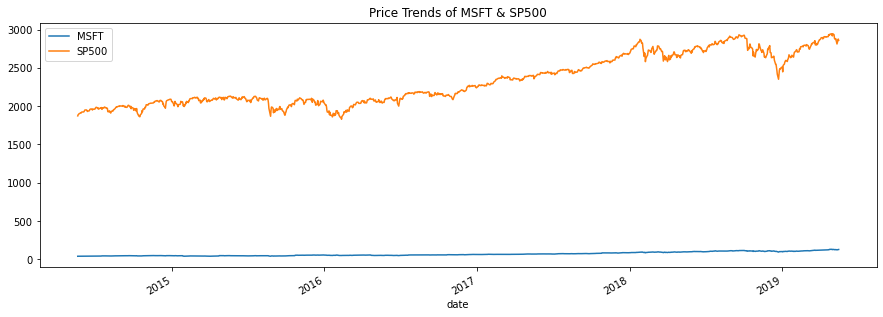

In [58]:
# Plot the data trends of the two variables over time
combined_data_frames.plot(title = "Price Trends of MSFT & SP500", figsize = (15,5))

## 8. Plot Price Relationships

<AxesSubplot:xlabel='MSFT', ylabel='SP500'>

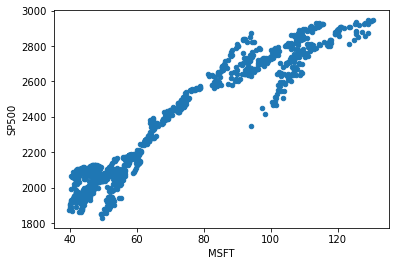

In [59]:
# Plot the relationship between the two variables
combined_data_frames.plot(kind="scatter", x = "MSFT", y = "SP500")

## 9. Calculate Correlation of Prices

In [60]:
# Calculate the correlation of closing prices between MSFT and SP500
price_correlation = combined_data_frames.corr()

## 10. Plot Correlation of Prices

<AxesSubplot:>

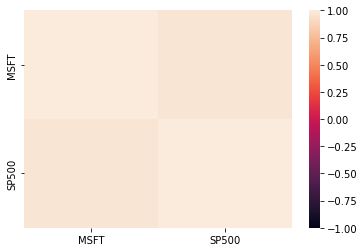

In [61]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation, vmin = -1, vmax = 1)

## 11. Calculate Daily Returns

In [62]:
# Use the `pct_change` function to calculate the daily returns for MSFT and SP500
daily_returns = combined_data_frames.pct_change()

## 12. Calculate Daily Return Trends

<AxesSubplot:title={'center':'Daily Return of MSFT & SP500'}, xlabel='date'>

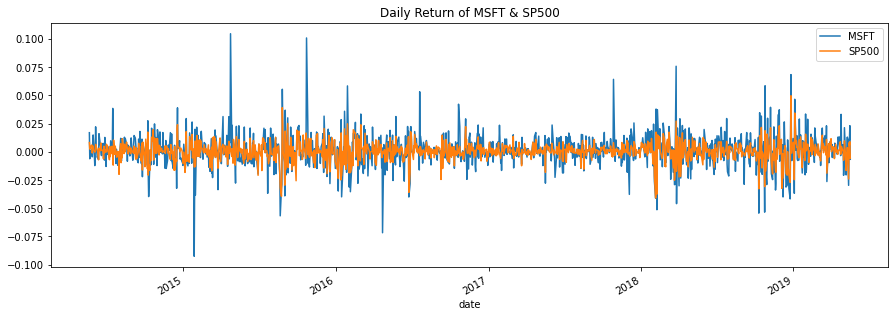

In [63]:
# Plot the daily returns of MSFT and SP500
daily_returns.plot(title = "Daily Return of MSFT & SP500", figsize = (15,5))

## 13. Calculate Daily Return Relationships

<AxesSubplot:xlabel='MSFT', ylabel='SP500'>

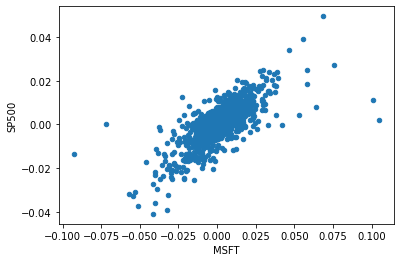

In [64]:
# Plot the relationship between the two variables
daily_returns.plot(kind = "scatter", x = "MSFT", y = "SP500")

## 14. Calculate Correlation of Daily Returns

In [65]:
# Calculate the correlation between each column
correlation = daily_returns.corr()
correlation

,MSFT,SP500
MSFT,1.000000,0.739661
SP500,0.739661,1.000000


## 15. Plot Correlation of Daily Returns

<AxesSubplot:>

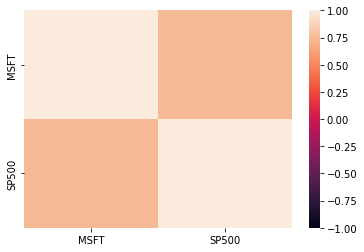

In [66]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(correlation, vmin = -1, vmax = 1)